### Stock Market Prediction And Forecasting Using Stacked LSTM

In [1]:
### Keras and Tensorflow >2.0

In [2]:
import numpy as np
import pandas as pd

In [3]:
from datetime import datetime

In [4]:
df = pd.read_csv("E:/Userfiles/Download/archive (2)/NIFTY50_all.csv")
df

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.00,959.00,962.90,984.72,27294366,2.687719e+15,NaN,9859619.0,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.00,885.00,893.90,941.38,4581338,4.312765e+14,NaN,1453278.0,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.00,887.00,884.20,888.09,5124121,4.550658e+14,NaN,1069678.0,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.00,929.00,921.55,929.17,4609762,4.283257e+14,NaN,1260913.0,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.00,980.00,969.30,965.65,2977470,2.875200e+14,NaN,816123.0,0.2741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235187,2021-04-26,ZEEL,EQ,188.00,190.60,191.10,185.10,186.70,186.40,187.35,8542755,1.600451e+14,52374.0,2340188.0,0.2739
235188,2021-04-27,ZEEL,EQ,186.40,188.00,192.95,186.80,188.80,188.15,189.41,14247767,2.698636e+14,73673.0,5425957.0,0.3808
235189,2021-04-28,ZEEL,EQ,188.15,188.80,190.60,187.10,188.95,189.10,188.85,8429439,1.591917e+14,44056.0,2413974.0,0.2864
235190,2021-04-29,ZEEL,EQ,189.10,190.80,191.65,186.00,186.60,186.55,187.44,9483009,1.777471e+14,60932.0,2744472.0,0.2894


In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df1 = df.set_index('Date')

In [6]:
df2 = df1.resample(rule='M').mean()
df2

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,
2000-01-31,990.750445,991.073220,1018.145401,956.927967,985.608754,985.506899,988.442849,8.483939e+05,4.265174e+13,NaN,NaN,NaN
2000-02-29,1009.437675,1027.197969,1053.553011,986.670658,1016.038866,1016.286625,1021.410952,6.002124e+05,4.069786e+13,NaN,NaN,NaN
2000-03-31,1009.531204,1015.878194,1049.629075,969.072761,1003.526285,1003.735536,1008.308003,6.247734e+05,3.572006e+13,NaN,NaN,NaN
2000-04-30,921.418241,919.170741,948.411481,881.949630,912.364352,912.327407,910.361278,9.699313e+05,4.260544e+13,NaN,NaN,NaN
2000-05-31,732.925379,731.916212,758.160379,700.234924,729.725530,728.820833,729.534818,6.969134e+05,3.985220e+13,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31,2403.160622,2409.947495,2436.912848,2378.259879,2407.066466,2408.197635,2407.561911,1.233988e+07,6.305715e+14,115861.473098,3.490097e+06,0.313972
2021-01-31,2475.701480,2481.782908,2511.538367,2442.836122,2470.326837,2471.411939,2476.754153,1.385968e+07,7.704854e+14,138824.626531,3.620827e+06,0.313678
2021-02-28,2566.874439,2571.901837,2612.556276,2531.970204,2572.978010,2572.369235,2573.184112,1.529610e+07,8.471368e+14,154885.755102,4.193736e+06,0.320195


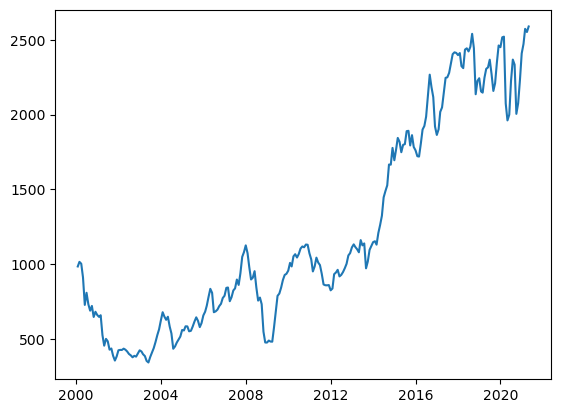

In [7]:
import matplotlib.pyplot as plt
plt.plot(df2.Close)

In [8]:
df2.head()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,
2000-01-31,990.750445,991.073220,1018.145401,956.927967,985.608754,985.506899,988.442849,848393.878338,4.265174e+13,NaN,NaN,NaN
2000-02-29,1009.437675,1027.197969,1053.553011,986.670658,1016.038866,1016.286625,1021.410952,600212.369748,4.069786e+13,NaN,NaN,NaN
2000-03-31,1009.531204,1015.878194,1049.629075,969.072761,1003.526285,1003.735536,1008.308003,624773.400881,3.572006e+13,NaN,NaN,NaN
2000-04-30,921.418241,919.170741,948.411481,881.949630,912.364352,912.327407,910.361278,969931.253704,4.260544e+13,NaN,NaN,NaN
2000-05-31,732.925379,731.916212,758.160379,700.234924,729.725530,728.820833,729.534818,696913.366667,3.985220e+13,NaN,NaN,NaN


In [9]:
df2.tail()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,
2020-12-31,2403.160622,2409.947495,2436.912848,2378.259879,2407.066466,2408.197635,2407.561911,1.233988e+07,6.305715e+14,115861.473098,3.490097e+06,0.313972
2021-01-31,2475.701480,2481.782908,2511.538367,2442.836122,2470.326837,2471.411939,2476.754153,1.385968e+07,7.704854e+14,138824.626531,3.620827e+06,0.313678
2021-02-28,2566.874439,2571.901837,2612.556276,2531.970204,2572.978010,2572.369235,2573.184112,1.529610e+07,8.471368e+14,154885.755102,4.193736e+06,0.320195
2021-03-31,2545.574344,2551.703741,2585.998056,2516.426968,2551.662196,2551.286832,2551.980097,1.161518e+07,6.588306e+14,126849.429543,3.833178e+06,0.362253
2021-04-30,2589.567186,2590.837111,2627.361600,2551.826369,2588.275564,2588.223631,2588.138346,1.099765e+07,7.313923e+14,133843.866810,3.015389e+06,0.342713


In [10]:
df1=df2.reset_index()['Close']

In [11]:
df1

0       985.506899
1      1016.286625
2      1003.735536
3       912.327407
4       728.820833
          ...     
251    2408.197635
252    2471.411939
253    2572.369235
254    2551.286832
255    2588.223631
Name: Close, Length: 256, dtype: float64

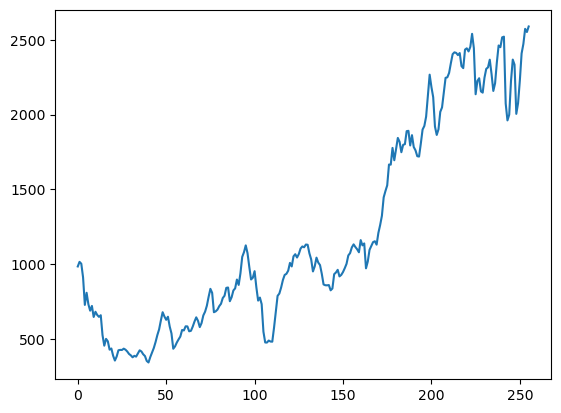

In [12]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [13]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [14]:
import numpy as np

In [15]:
df1

0       985.506899
1      1016.286625
2      1003.735536
3       912.327407
4       728.820833
          ...     
251    2408.197635
252    2471.411939
253    2572.369235
254    2551.286832
255    2588.223631
Name: Close, Length: 256, dtype: float64

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [17]:
print(df1)

[[0.28574187]
 [0.299459  ]
 [0.29386555]
 [0.2531291 ]
 [0.17134854]
 [0.20740436]
 [0.17342743]
 [0.15419175]
 [0.16827963]
 [0.13545528]
 [0.15091329]
 [0.14142439]
 [0.13572949]
 [0.14063332]
 [0.08131356]
 [0.0499775 ]
 [0.0702398 ]
 [0.06303491]
 [0.03824886]
 [0.0415193 ]
 [0.02001961]
 [0.00570752]
 [0.01780988]
 [0.03632795]
 [0.03747382]
 [0.03720938]
 [0.04115181]
 [0.03805985]
 [0.03258518]
 [0.02532459]
 [0.02125903]
 [0.01545318]
 [0.01977002]
 [0.01745184]
 [0.0268718 ]
 [0.03615981]
 [0.03275661]
 [0.02443531]
 [0.01912417]
 [0.00463304]
 [0.        ]
 [0.01597393]
 [0.02963567]
 [0.04304643]
 [0.06083373]
 [0.0814448 ]
 [0.09852879]
 [0.12520264]
 [0.14956139]
 [0.13688683]
 [0.12700582]
 [0.13609749]
 [0.10697778]
 [0.08627746]
 [0.04088874]
 [0.04775549]
 [0.05927811]
 [0.06869759]
 [0.07716523]
 [0.09667353]
 [0.09534676]
 [0.10763937]
 [0.10733165]
 [0.09279459]
 [0.09415692]
 [0.1065918 ]
 [0.12158216]
 [0.13434857]
 [0.12395139]
 [0.10530462]
 [0.11718376]
 [0.14

In [18]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [19]:
training_size,test_size

(166, 90)

In [20]:
train_data

array([[0.28574187],
       [0.299459  ],
       [0.29386555],
       [0.2531291 ],
       [0.17134854],
       [0.20740436],
       [0.17342743],
       [0.15419175],
       [0.16827963],
       [0.13545528],
       [0.15091329],
       [0.14142439],
       [0.13572949],
       [0.14063332],
       [0.08131356],
       [0.0499775 ],
       [0.0702398 ],
       [0.06303491],
       [0.03824886],
       [0.0415193 ],
       [0.02001961],
       [0.00570752],
       [0.01780988],
       [0.03632795],
       [0.03747382],
       [0.03720938],
       [0.04115181],
       [0.03805985],
       [0.03258518],
       [0.02532459],
       [0.02125903],
       [0.01545318],
       [0.01977002],
       [0.01745184],
       [0.0268718 ],
       [0.03615981],
       [0.03275661],
       [0.02443531],
       [0.01912417],
       [0.00463304],
       [0.        ],
       [0.01597393],
       [0.02963567],
       [0.04304643],
       [0.06083373],
       [0.0814448 ],
       [0.09852879],
       [0.125

In [21]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [22]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 20
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [23]:
print(X_train.shape), print(y_train.shape)

(145, 20)
(145,)


(None, None)

In [24]:
print(X_test.shape), print(ytest.shape)

(69, 20)
(69,)


(None, None)

In [25]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [26]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [27]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(20,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 20, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 20, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=50,batch_size=64,verbose=1)

Epoch 1/50
3/3 [==============================] - 8s 737ms/step - loss: 0.0387 - val_loss: 0.3667
Epoch 2/50
3/3 [==============================] - 0s 66ms/step - loss: 0.0133 - val_loss: 0.0770
Epoch 3/50
3/3 [==============================] - 0s 76ms/step - loss: 0.0110 - val_loss: 0.0547
Epoch 4/50
3/3 [==============================] - 0s 89ms/step - loss: 0.0090 - val_loss: 0.1455
Epoch 5/50
3/3 [==============================] - 0s 65ms/step - loss: 0.0076 - val_loss: 0.2017
Epoch 6/50
3/3 [==============================] - 0s 63ms/step - loss: 0.0088 - val_loss: 0.1798
Epoch 7/50
3/3 [==============================] - 0s 54ms/step - loss: 0.0077 - val_loss: 0.1260
Epoch 8/50
3/3 [==============================] - 0s 53ms/step - loss: 0.0065 - val_loss: 0.0715
Epoch 9/50
3/3 [==============================] - 0s 63ms/step - loss: 0.0064 - val_loss: 0.0514
Epoch 10/50
3/3 [==============================] - 0s 59ms/step - loss: 0.0064 - val_loss: 0.0502
Epoch 11/50
3/3 [===========

In [31]:
import tensorflow as tf

In [32]:
tf.__version__

'2.11.0'

In [38]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

3/3 [==============================] - 0s 8ms/step


In [39]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [40]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

798.3075986919854

In [41]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

1662.8437472484557

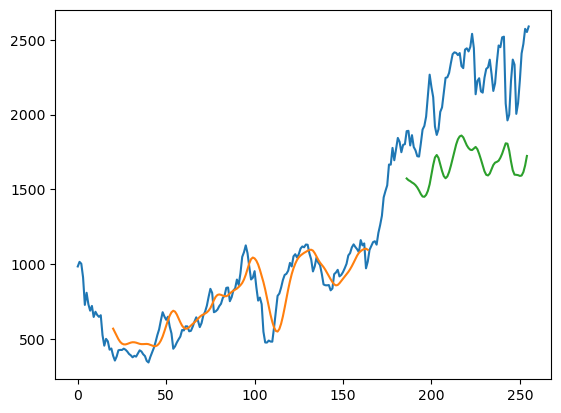

In [56]:
### Plotting 
# shift train predictions for plotting
look_back=20
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [64]:
trainPredictPlot = pd.DataFrame(trainPredictPlot)

testPredictPlot = pd.DataFrame(testPredictPlot)